# Statistical Learning

http://scikit-learn.org/stable/tutorial/statistical_inference/settings.html


Scikit-learn deals with learning information from one or more datasets that are represented as 2D arrays. They can be understood as a list of multi-dimensional observations. We say that the first axis of these arrays is the samples axis, while the second is the features axis.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

In [3]:
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [4]:
data = iris.data

data.shape

(150, 4)

This is in shape just to fit

# Reshaping

In [5]:
digits = datasets.load_digits()
digits.images.shape

(1797, 8, 8)

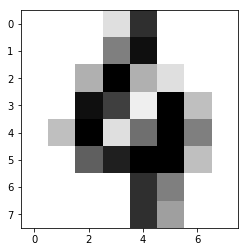

In [6]:
plt.imshow(digits.images[100], cmap=plt.cm.gray_r) 

In [7]:
data = digits.images.reshape((digits.images.shape[0], -1))

# Supervised Learning

http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html

In [11]:
iris_X = iris.data
iris_Y = iris.target
print(iris_X.shape)
np.unique(iris_Y)

(150, 4)


array([0, 1, 2])

Vamos a separar en conjunto de train y test

In [13]:
X_train, Y_train = iris_X[:-20], iris_Y[:-20]

X_test, Y_test = iris_X[-20:], iris_Y[-20:]

print("Training shape: {}".format(X_train.shape))
print("Test shape: {}".format(X_test.shape))


Training shape: (130, 4)
Test shape: (20, 4)


# Clasificador: KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [16]:
help(knn.score)

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.neighbors.classification.KNeighborsClassifier instance
    Returns the mean accuracy on the given test data and labels.
    
    In multi-label classification, this is the subset accuracy
    which is a harsh metric since you require for each sample that
    each label set be correctly predicted.
    
    Parameters
    ----------
    X : array-like, shape = (n_samples, n_features)
        Test samples.
    
    y : array-like, shape = (n_samples) or (n_samples, n_outputs)
        True labels for X.
    
    sample_weight : array-like, shape = [n_samples], optional
        Sample weights.
    
    Returns
    -------
    score : float
        Mean accuracy of self.predict(X) wrt. y.



In [17]:
knn.score(X_test, Y_test)

1.0

Wow

In [18]:
knn.score(X_train, Y_train)

0.96923076923076923

# Linear Model

In [28]:
diabetes = datasets.load_diabetes()
diabetes_X_train = diabetes.data[:-20]
diabetes_y_train = diabetes.target[:-20]
diabetes_X_test  = diabetes.data[-20:]

diabetes_y_test  = diabetes.target[-20:]



In [30]:

from sklearn import linear_model
regr = linear_model.LinearRegression()

regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
print(regr.coef_)

[  3.03499549e-01  -2.37639315e+02   5.10530605e+02   3.27736980e+02
  -8.14131709e+02   4.92814588e+02   1.02848452e+02   1.84606489e+02
   7.43519617e+02   7.60951722e+01]


Let's calculate Mean Squared Error

In [32]:
np.mean((regr.predict(diabetes_X_test)-diabetes_y_test)**2)

2004.5676026898207

In [34]:
help(regr.score)

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.linear_model.base.LinearRegression instance
    Returns the coefficient of determination R^2 of the prediction.
    
    The coefficient R^2 is defined as (1 - u/v), where u is the residual
    sum of squares ((y_true - y_pred) ** 2).sum() and v is the total
    sum of squares ((y_true - y_true.mean()) ** 2).sum().
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always
    predicts the expected value of y, disregarding the input features,
    would get a R^2 score of 0.0.
    
    Parameters
    ----------
    X : array-like, shape = (n_samples, n_features)
        Test samples.
    
    y : array-like, shape = (n_samples) or (n_samples, n_outputs)
        True values for X.
    
    sample_weight : array-like, shape = [n_samples], optional
        Sample weights.
    
    Returns
    -------
    score : float


In [35]:
regr.score(diabetes_X_test, diabetes_y_test) 

0.58507530226905746


# Shrinkage

If there are few data points per dimension, noise in the observations induces high variance:

In [44]:
X = np.c_[ .5, 1].T
y = [.5, 1]
test = np.c_[ 0, 2].T
regr = linear_model.LinearRegression()



Let's add some Gaussian noise to see what happens with the regression

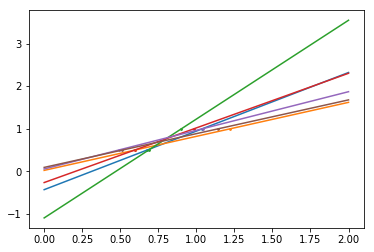

In [45]:

np.random.seed(0)
for _ in range(6): 
    this_X = .1*np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test)) 
    plt.scatter(this_X, y, s=3)  

A solution in high-dimensional statistical learning is to shrink the regression coefficients to zero: any two randomly chosen set of observations are likely to be uncorrelated. This is called Ridge regression:

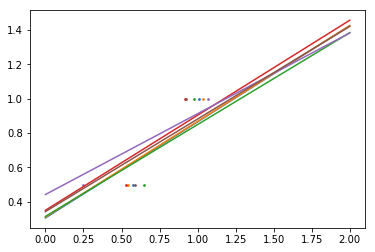

In [46]:
regr = linear_model.Ridge(alpha=.1)

for _ in range(6): 
    this_X = .1*np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test)) 
    plt.scatter(this_X, y, s=3) 
